## Image Arithmetic

Difference between OpenCV and NumPy addition.

NumPy will perform modulus arithmetic and “wrap around.” 

OpenCV, on the other hand, will perform clipping and ensure pixel values never fall outside the range [0, 255].

## Translation:

Translation is the shifting of an image along the x and y axis. 

Using translation, we can shift an image up, down, left, or right, along with any combination of the above.
	
Mathematically, we define a translation matrix M that we can use to translate an image:

M=[1 0 tx; 0 1 ty]

where tx is the number of pixels we will shift the image left or right. Negative values of tx will shift the image to the left and positive values will shift the image to the right.

where ty is the number of pixels we will shift the image up or down. Negative values of ty will shift the image up and positive values will shift the image down.

The function warpAffine transforms the source image using the specified matrix:

dst(x,y)=src(M11 x + M12 y + M13, M21 x + M22 y + M23)

## Rotation

Rotating an image by some angle Θ.

Rotation by an angle Θ, can be defined by constructing a matrix M in the form:

M=[cosΘ -sinΘ;sinΘ cosΘ]

Given an (x, y)-Cartesian plane, this matrix can be used to rotate a vector Θ degrees (counter-clockwise) about the origin. 
	
In this case, the origin is normally the center of the image; however, in practice we can define any arbitrary (x, y) coordinate as our rotation center.

From the original image I, the rotated image R is then obtained by simple matrix multiplication, R=IM.
	
However, OpenCV also provides the ability to (1) scale (i.e. resize) an image and (2) provide an arbitrary rotation center to perform the rotation about.

Our modified rotation matrix M is thus,

M=[α β (1-α)*cx-β*cy; -β α β*cx+(1-α)*cy]

where α=scale * cosθ, β=scale * sinθ, cx and cy are the respective (x, y)-coordinates that the rotation is performed about.


## Resizing

Scaling, or simply resizing, is the process of increasing or decreasing the size of an image in terms of width and height.

When resizing an image, it’s important to keep in mind the aspect ratio ( which is the ratio of the width of the image to the height of an image). 

Ignoring the aspect ratio can lead to resized images that look compressed and distorted.

The formal definition of interpolation is “the method of constructing new data points within the range of discrete set of known points.” 

In this case, the “known points” are the pixels of our original image. 

And the goal of an interpolation function is to take these neighborhoods of pixels and use them to either increase or decrease the size of image.
	
In general, it’s far more beneficial (and visually appealing) to decrease the size of the image. This is because the interpolation function simply has to remove pixels from an image. 

On the other hand, if we were to increase the size of the image the interpolation function would have to “fill in the gaps” between pixels that previously did not exist.

### Interpolation Methods:

The goal of an interpolation function is to examine neighborhoods of pixels and use these neighborhoods optically increase or decrease the size of image without introducing distortions (or at least as few distortions as possible).

The first method is nearest neighbor interpolation, specified by the cv2.INTER_NEAREST flag. This method is the simplest approach to interpolation. Instead of calculating weighted averages of neighboring pixels or applying complicated rules, this method simply finds the “nearest” neighboring pixel and assumes the intensity value. While this method is fast and simple, the quality of the resized image tends to be quite poor and can lead to “blocky” artifacts.

Secondly, we have the cv2.INTER_LINEAR method with performs bilinear interpolation (y=mx+c). OpenCV uses this method by default when resizing images. Taking neighboring pixels and using this neighborhood to actually calculate what the interpolated value should be (rather than just assuming the nearest pixel value).

Other methods are cv2.INTER_AREA, cv2.INTER_CUBIC and cv2.INTER_LANCZOS4 interpolation methods.

cv2.INTER_CUBIC and cv2.INTER_LANCZOS4 methods are slower (since they no longer use simple linear interpolation and instead use splines) and utilize bicubic interpolation over square pixel neighborhoods. The cv2.INTER_CUBIC method operates on a 4 x 4 pixel neighbor and cv2.INTER_LANZOS4 operates over a 8 x 8 pixel neighborhood.

### So which interpolation method should you be using?

In general, cv2.INTER_NEAREST is quite fast, but does not provide the highest quality results. So in very resource-constrained environments, consider using nearest neighbor interpolation.

When increasing (up sampling) the size of an image, consider using cv2.INTER_LINEAR and cv2.INTER_CUBIC. The cv2.INTER_LINEAR method tends to be slightly faster than the cv2.INTER_CUBIC method, but go with whichever one gives you the best results for your images.

When decreasing (down sampling) the size of an image, the OpenCV documentation suggests using cv2.INTER_AREA— although this method is very similar to nearest neighbor interpolation. In either case, decreasing the size of an image (in terms of quality) is always an easier task than increasing the size of an image.

Finally, as a general rule, cv2.INTER_LINEAR interpolation method is recommended as the default for up sampling or down sampling. Because it simply provides the highest quality results at a modest computation cost.


## Flipping

OpenCV also provides methods to flip an image across its x or y axis or even both. 

Flipping operations are used less often.

## Cropping

Cropping is the act of selecting and extracting the Region of Interest (or simply, ROI), which is the part of the image we are interested in.

When we crop an image, we want to remove the outer parts of the image that we are not interested in. This is commonly called selecting our Region of Interest, or more simply, our ROI.

Example: In a face detection application, we would want to crop the face from an image. 

And if we were developing a Python script to recognize dogs in images, we may want to crop the dog from the image once we have found it.

In [1]:
#!/usr/bin/python
# -*- coding: latin-1 -*-
# import the necessary packages
# user created library "imutils" contains a handful of “convenience” methods to more easily
# perform common tasks like translation, rotation, and resizing (and with less code).
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [2]:
from google.colab import files
uploaded = files.upload()

Saving apj.jpg to apj.jpg


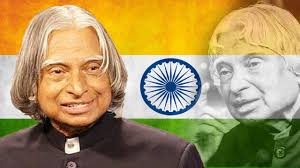

In [3]:
img = cv2.imread("apj.jpg")
cv2_imshow(img)

In [4]:
# images are NumPy arrays, stored as unsigned 8 bit integers -- this implies that the values of
# our pixels will be in the range [0, 255]; when using functions like cv2.add and cv2.subtract, 
# values will be clipped to this range, even if the added or subtracted values fall outside the
# range of [0, 255]. Check out an example:
print ("max of 255: " + str(cv2.add(np.uint8([200]), np.uint8([100]))))
print ("min of 0: " + str(cv2.subtract(np.uint8([50]), np.uint8([100]))))

max of 255: [[255]]
min of 0: [[0]]


In [5]:
# NOTE: if you use NumPy arithmetic operations on these arrays, the value will be modulos #(wrap around) instead of being clipped to the [0, 255] range. This is important to keep in mind # when working with images.
print ("wrap around: " + str(np.uint8([200]) + np.uint8([100])))
print ("wrap around: " + str(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
wrap around: [206]


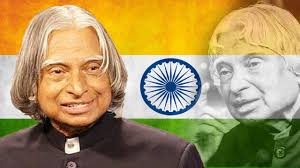

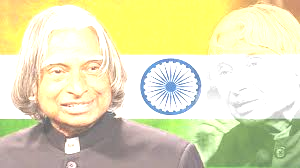

In [6]:
# let's increase the intensity of all pixels in our image by 100 -- we accomplish this by 
# constructing a NumPy array that is the same size of our matrix (filled with ones) and the
# multiplying it by 100 to create an array filled with 100's, then we simply add the images 
# together; notice how the image is "brighter"
M = np.ones(img.shape, dtype = "uint8") * 100
added = cv2.add(img, M)
cv2_imshow(img)
print("\n")
cv2_imshow(added)

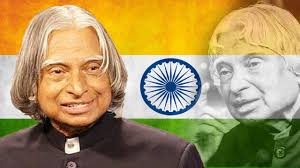

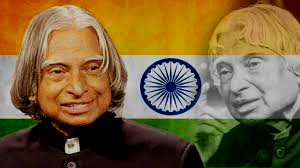

In [7]:
# similarly, we can subtract 50 from all pixels in our image and make it darker
M = np.ones(img.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(img, M)
cv2_imshow(img)
print("\n")
cv2_imshow(subtracted)

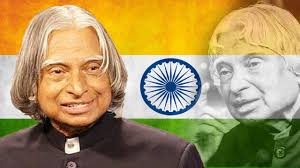

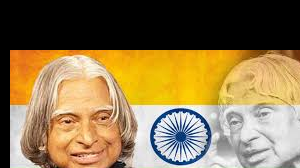

In [8]:
# NOTE: Translating (shifting) an image is given by a NumPy matrix in the form:
# [[1, 0, shiftX], [0, 1, shiftY]]
# You simply need to specify how many pixels you want to shift the image in the X and Y
# let's translate the image 10 pixels to the right and 50 pixels down
# Now that we have our translation matrix defined, the actual translation takes place using the
# cv2.warpAffine function. The first argument is the image we wish to shift and the second
# argument is our translation matrix M. Finally, we manually supply the dimensions (width and 
# height) of our image as the third argument.
M = np.float32([[1, 0, 10], [0, 1, 50]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2_imshow(img)
print("\n")
cv2_imshow(shifted)

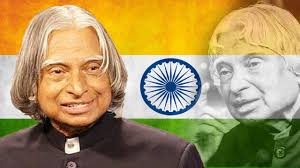

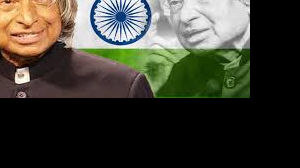

In [9]:
# now, let's shift the image 50 pixels to the left and 70 pixels up, we
# accomplish this using negative values
M = np.float32([[1, 0, -50], [0, 1, -70]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2_imshow(img)
print("\n")
cv2_imshow(shifted)

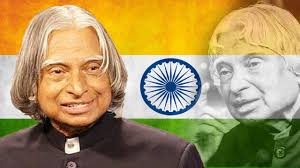

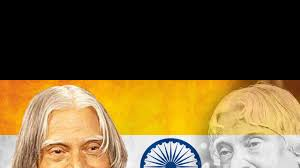

In [ ]:
# finally, let's use our helper function in imutils to shift the image down 80 pixels
shifted = imutils.translate(img, 0, 80)
cv2_imshow(img)
print("\n")
cv2_imshow(shifted)

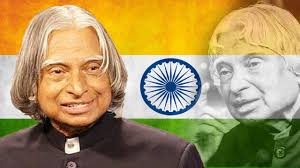

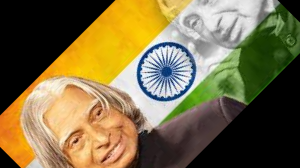

In [ ]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = img.shape[:2]
(cX, cY) = (w / 2, h / 2)

# rotate our image by 45 degrees (counter clockwise rotation), scale value of 1.0
# scale value of 2.0, the image will be doubled in size
# scale value of 0.5, the image will be half the original size
# If you want the entire image to fit into view after the rotation you’ll need to modify the width
# and height, denoted as (w, h) in the cv2.warpAffine function.
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
cv2_imshow(img)
print("\n")
cv2_imshow(rotated)

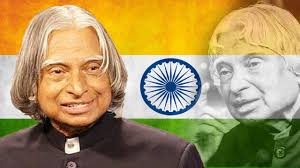

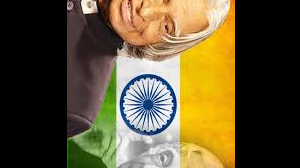

In [ ]:
# rotate our image by -90 degrees (clock wise rotation by 90 degree)
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
cv2_imshow(img)
print("\n")
cv2_imshow(rotated)

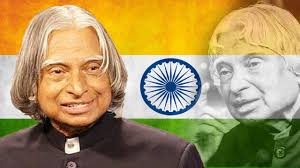

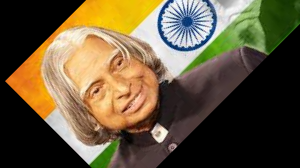

In [ ]:
# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((cX - 50, cY - 50), 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
cv2_imshow(img)
print("\n")
cv2_imshow(rotated)

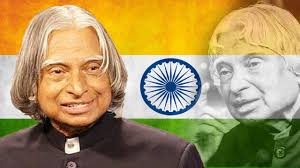

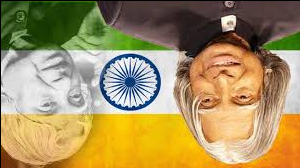

In [ ]:
# finally, let's use our helper function in imutils to rotate the image by 180 degrees (flipping it 
# upside down)
rotated = imutils.rotate(img, 180)
cv2_imshow(img)
print("\n")
cv2_imshow(rotated)

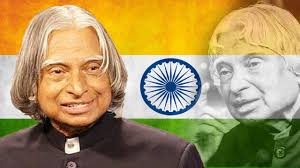

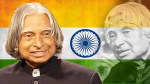

In [ ]:
# we need to keep in mind aspect ratio so the image does not look skewed or distorted  
# we calculate the ratio of the new image to the old image. 
# Let's make our new image have a width of 150 pixels
# Aspect ratio=width/height
# In order to compute the ratio of the new height to the old height, we simply define our ratio r to 
# be the new width (150 pixels) divided by the old width, which we access using image.shape[1]
# Now that we have our ratio, we can compute the new dimensions of the image. 
# The height is then computed by multiplying the old height by our ratio and converting it to an 
# integer. By performing this operation we are able to preserve the original aspect ratio of the #image.
r = 150.0 / img.shape[1]
dim = (150, int(img.shape[0] * r))

# perform the actual resizing of the image
# The last parameter is our interpolation method, which is the algorithm working behind the
 # scenes to handle how the actual image is resized.
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(img)
print("\n")
cv2_imshow(resized)

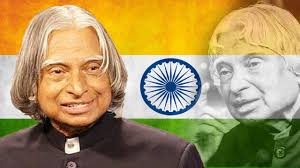

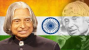

In [ ]:
# what if we wanted to adjust the height of the image? We can apply the same concept, again 
# keeping in mind the aspect ratio, but instead calculating the ratio based on height -- let's make 
# the height of the resized image 50 pixels
# The new width is obtained by multiplying the old width by the ratio, again allowing us to #maintain the original aspect ratio of the image.
r = 50.0 / img.shape[0]
dim = (int(img.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(img)
print("\n")
cv2_imshow(resized)

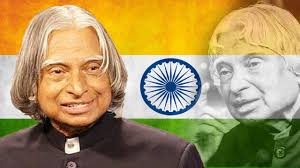

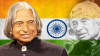

In [ ]:
# of course, calculating the ratio each and every time we want to resize  an image is a real pain # let's create a function where we can specify our target width or height, and have it take care of # the rest for us.
resized = imutils.resize(img, width=100)
cv2_imshow(img)
print("\n")
cv2_imshow(resized)

In [ ]:
# construct the list of interpolation methods
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

cv2_imshow(img)
print("\n")

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current interpolation method
	resized = imutils.resize(img, width=img.shape[1] * 3, inter=method)
	cv2_imshow(resized)
	print("\n")

Output hidden; open in https://colab.research.google.com to view.

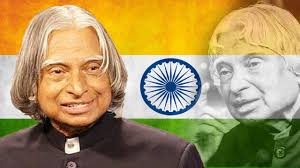

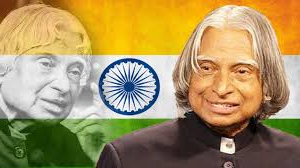

In [ ]:
# flip the image horizontally (code/flag=1)
flipped = cv2.flip(img, 1)
cv2_imshow(img)
print("\n")
cv2_imshow(flipped)

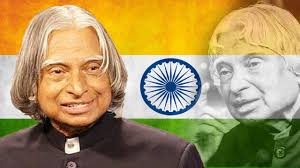

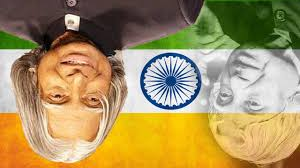

In [ ]:
# flip the image vertically (code/flag=0)
flipped1 = cv2.flip(img, 0)
cv2_imshow(img)
print("\n")
cv2_imshow(flipped1)

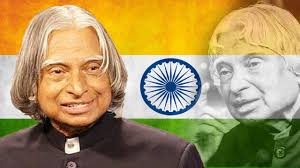

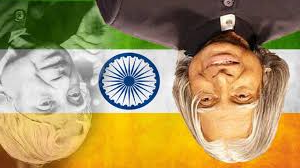

In [ ]:
# flip the image along both axes (code/flag=-1)
flipped2 = cv2.flip(img, -1)
cv2_imshow(img)
print("\n")
cv2_imshow(flipped2)

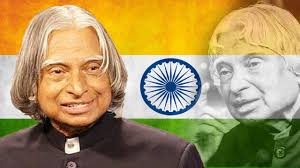

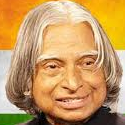

In [ ]:
# cropping an image is accomplished using simple NumPy array slices (h, w) --
# let's crop the face from the image
face = img[5:130, 5:130]
cv2_imshow(img)
print("\n")
cv2_imshow(face)